<a href="https://colab.research.google.com/github/Danjstr/Capstone_CNN/blob/main/CapstoneV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About This Dataset

The following fruits are included:


Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Beetroot Red, Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cauliflower, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Corn (with husk), Cucumber (ripened), Dates, Eggplant, Fig, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Forelle, Kaiser, Monster, Red, Stone, Williams), Pepper (Red, Green, Orange, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, Sweet, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow, not ripened, Heart), Walnut, Watermelon.



Dataset properties
The total number of images: 90483.

Training set size: 67692 images (one fruit or vegetable per image).

Test set size: 22688 images (one fruit or vegetable per image).

The number of classes: 131 (fruits and vegetables).

Image size: 100x100 pixels.

Filename format: imageindex100.jpg (e.g. 32100.jpg) or rimageindex100.jpg (e.g. r32100.jpg) or r2imageindex100.jpg or r3imageindex100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).

## Abstract

There are hundreds of different types of fruit in the world. They grow in different regions and can often be mistaken for one another. Even with our modern distribution systems, one might find that they simply don't recognize a new type of fruit that is not stocked at the local supermarket. An image classifier for different types of fruit may be invaluable at identifying a new fruit that some has never seen before.
More so successfully classifying images has more real-world use cases. For example, during self-checkout at groceries, a successful image classifier can automatically detect what type of fruit is on the scale and thereby save the customer time typing it in.
Image classification has a whole host of other use cases some of which are being used for research to save lives. For example, looking at slides and trying to determine which ones contain cancer cells. 

## Import all Dependencies

The following imports will be used throughout our attempt to make a CNN classifier for 131 different types of fruit.

In [ ]:
# Import all dependancies
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

import os
import pathlib
from zipfile import ZipFile
import PIL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
from google.colab import drive
from sklearn.utils import shuffle 

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as pl

## Getting Started

To begin we need to import our data. Importing data for this dataset can be tricky due to the sheer volume of images in the data set. The abundant images makes the files far to large to download easily. This means we can not simply download the data from Kaggle to our computer and upload it to Colab. The solution is to get an API key from Kaggle and directly pip install the data into colabs gdrive then unzip the files.

In [ ]:

!pip install -q kaggle


Important Note: The Kaggle.json file will be uploaded separately onto github. Be sure to download it and upload it into google colab during this step. Without the JSON API key, you will not be able to access the data set on kaggle. Alternatively, you can get your own API from kaggle and use that instead.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danjstr86","key":"b133781c81b7441dc122e1675a81ae9a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           8369  
mkoklu42/pistachio-dataset                                       Pistachio Dataset                                    2MB  2022-02-11 21:06:50            157  
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            136  
mkoklu42/pumpkin-seeds-dataset                                   Pumpkin Seeds Dataset                              393KB  2022-02-08 15:54:27            725  
prasertk/netflix-subscription-price-in-d

In [ ]:
! kaggle datasets download -d moltean/fruits -p /content/gdrive/MyDrive/datasets

100% 1.28G/1.28G [00:09<00:00, 87.9MB/s]
100% 1.28G/1.28G [00:09<00:00, 146MB/s] 


In [ ]:
! unzip /content/gdrive/MyDrive/datasets/fruits.zip -d /content/gdrive/MyDrive/datasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: /content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training/

After unzipping the files we still need to bring all the images for our training data and our validation data into our workflow so that we can begin building our classifier. This is done with pathlib.Path to directly call the gdrive paths of our training and validation data. Both the training and the validation data are loaded separately so we will not have to split them later. Note: Validation data is saved in test_dir and training data is saved in train_dir.

In [ ]:
train_dir = pathlib.Path("/content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Training")
test_dir = pathlib.Path("/content/gdrive/MyDrive/datasets/fruits-360_dataset/fruits-360/Test")

Get a count of all the training images in our dataset to make sure they were loaded properly. We have 67,692 images. Which is exactly what we were looking for.

In [ ]:
#Get a count of all the images in our training data
image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

67692

## Visualization

Now we want to visualize some samples from our training and validation data sets. We want to visually confirm that our datasets have been properly uploaded. It's important to note that images in this dataset are 100 x 100 in dimensions. We do a little preprocessing just to make sure that is the case and that all images have the same height and width.

In [ ]:
#Make sure all the images are 100x 100
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size=(100, 100),
    batch_size=32
)

Found 67692 files belonging to 131 classes.


In [ ]:
#Make sure all the images are 100x 100
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=42,
    image_size=(100, 100),
    batch_size=32
)

Found 22688 files belonging to 131 classes.


Now we need to confirm that we have a class name for each of the 131 types of fruit in this dataset.

In [ ]:
class_names = train_ds.class_names

In [ ]:
len(class_names)

131

Great, let's visually confirm that we have all the data that we need. We will be showing 15 images from our training and test dataset to make sure that our imports have gone successfully and that we have a variety of different fruits. 

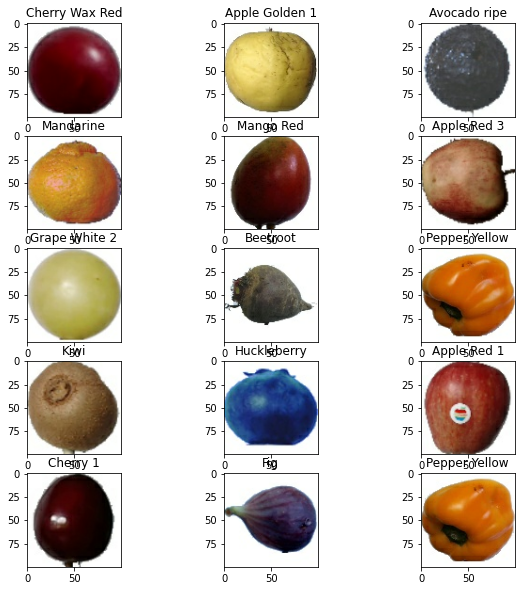

In [ ]:
#Show some images for our traing data
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(15):
        plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        

In [ ]:
class_names_t = train_ds.class_names

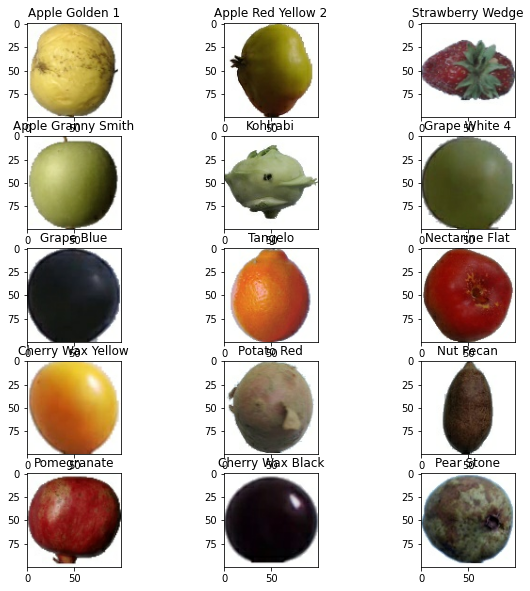

In [ ]:
#Show some images for our test data
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
    for i in range(15):
        plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names_t[labels[i]])

Now we can get to some serious preprocessing for our images. First, we need to rescale our data as this allows us to show all images in the same range between 0 and 1. Rotation_range, width_shift, height_shift, shear_range, zoom_range, and horizontal flip all make our data more robust. Data augmentation is really important when working with CNN's especially if you have few sample images for each class. 

In [ ]:
#Preprocess our training Data
train_ds = ImageDataGenerator(
 rescale = 1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest'
)

In [ ]:
#Preprocess our test Data
test_ds = ImageDataGenerator(
 rescale = 1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest'
)

We need to make sure that we are building a categorical model as we have 131 classes. If we build a binary model we would be effectively training our model to only work with two types of fruit. 

In [ ]:
#Make sure class mode is set to categorical
train_gen = train_ds.flow_from_directory(
 train_dir,
 target_size=(100,100),
 class_mode='categorical'
)

Found 67692 images belonging to 131 classes.


In [ ]:
#Make sure class mode is set to categorical
test_gen = test_ds.flow_from_directory(
 test_dir,
 target_size=(100,100),
 class_mode='categorical'
)

Found 22688 images belonging to 131 classes.


## Build and Train our Model one with an optimizer of RMSPROM the other with an optimizer of ADAM.



#Optimizer RMSPROP

I tried a variety of variations to the below code. My original design had convolutional layers. This did not work out well as I was seeing some serious overfitting with my results. In the end, I solved the problem of overfitting using a variety of methods. First, I reduced the complexity of the model by removing some of the superfluous convolutions. Next, I added dropout. Last I changed the number of epochs I was running the model for. During multiple test runs, I determined that I was beginning to see overfitting on average every fifth or sixth epoch. As such, I cut the model from 10 epochs to 6. I considered using early stopping but due to how quickly the model was overfitting I decided to manually select the best number of epochs from my observations.

In [ ]:
model = tf.keras.models.Sequential([
 # Note the input shape is the desired size of the image:
 
 # This is the first convolution
 tf.keras.layers.Conv2D(64, (3,3), activation='relu',
 input_shape=(100, 100, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 # The second convolution
 tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # Flatten the results
 tf.keras.layers.Flatten(),
 # 524 neuron hidden layer
 tf.keras.layers.Dense(524, activation='relu'),
 #Deploy some dropout to help with overfitting
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(131, activation='softmax')
])

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
#wait for the model to train
history = model.fit(train_gen, epochs=6,
 validation_data = test_gen, verbose = 1)

Epoch 1/6
2116/2116 [==============================] - 359s 165ms/step - loss: 1.1037 - accuracy: 0.6895 - val_loss: 0.4572 - val_accuracy: 0.8678
Epoch 2/6
2116/2116 [==============================] - 350s 165ms/step - loss: 0.3205 - accuracy: 0.9053 - val_loss: 0.3314 - val_accuracy: 0.9111
Epoch 3/6
2116/2116 [==============================] - 346s 163ms/step - loss: 0.2610 - accuracy: 0.9331 - val_loss: 0.2306 - val_accuracy: 0.9440
Epoch 4/6
2116/2116 [==============================] - 343s 162ms/step - loss: 0.2459 - accuracy: 0.9432 - val_loss: 0.4027 - val_accuracy: 0.9155
Epoch 5/6
2116/2116 [==============================] - 350s 166ms/step - loss: 0.2653 - accuracy: 0.9461 - val_loss: 0.4793 - val_accuracy: 0.9228
Epoch 6/6
2116/2116 [==============================] - 344s 163ms/step - loss: 0.2955 - accuracy: 0.9468 - val_loss: 0.3553 - val_accuracy: 0.9420


A summary of our model shows us that our total parameters and our trainable parameters were the same and were over 35,000,000. 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 67712)             0         
                                                                 
 dense (Dense)               (None, 524)               3

# Visualize our Performance

Here we can see the Training loss and validation loss for our six epochs. We can see that overall our training loss performed very well. However, there are clear signs of overfitting on the sixth epoch with validation loss jumping to 0.6163. It may have been better to stop on the fifth epoch.

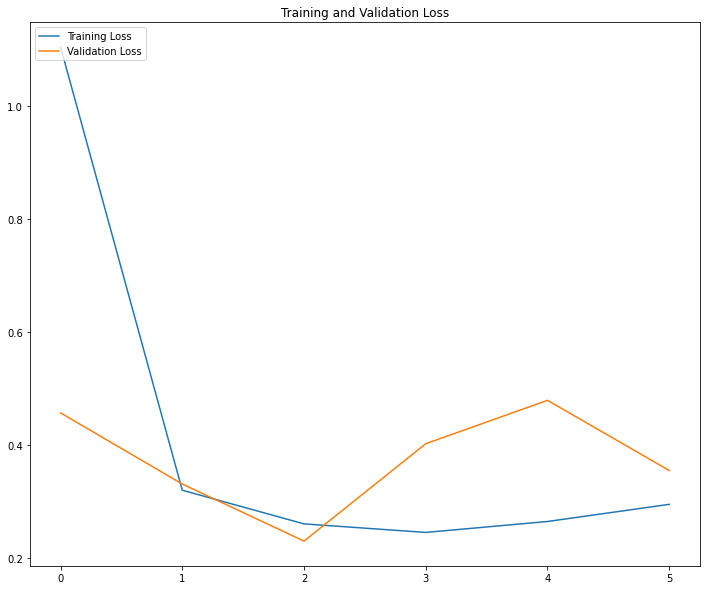

In [ ]:
#Lets take a look at our training loss vs our validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(12, 10))
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.show()

Here we can see the Training accuracy and validation accuracy for our six epochs. We can see that overall both our validation and training accuracy are highly aligned. The two seem to indicate that the module can predict which fruit is which with over 90% accuracy. However, the overfitting seen in the Validation Loss above is still concerning.

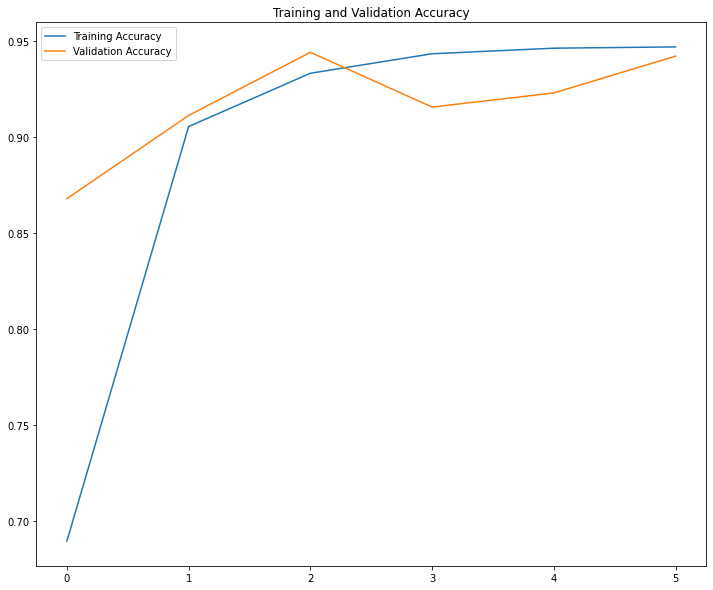

In [ ]:
#Lets take a look at our training accuracy vs our validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(6)

plt.figure(figsize=(12, 10))
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
#Save the model
model.save('model.fruit')

INFO:tensorflow:Assets written to: model.fruit/assets


Now we have seen how well our model has performed A high validation accuracy, and a low validation loss are what we were hoping for. As those are indicators of a well-performing model. We can see here that we have high accuracy, but we also have high validation loss which is a clear sign of overfitting. Regardless our model should be somewhat predictive of new images and should be able to pinpoint the class of a random fruit image with reasonable success.

# Optimizer ADAM

In [ ]:
model = tf.keras.models.Sequential([
 # Note the input shape is the desired size of the image:
 
 # This is the first convolution
 tf.keras.layers.Conv2D(64, (3,3), activation='relu',
 input_shape=(100, 100, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 # The second convolution
 tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 # Flatten the results
 tf.keras.layers.Flatten(),
 # 524 neuron hidden layer
 tf.keras.layers.Dense(393, activation='relu'),
 #Deploy some dropout to help with overfitting
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(131, activation='softmax')
])

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
#wait for the model to train
history = model.fit(train_gen, epochs=6,
 validation_data = test_gen, verbose = 1)

Epoch 1/6
2116/2116 [==============================] - 346s 163ms/step - loss: 1.1145 - accuracy: 0.6765 - val_loss: 0.3876 - val_accuracy: 0.8794
Epoch 2/6
2116/2116 [==============================] - 345s 163ms/step - loss: 0.3058 - accuracy: 0.8968 - val_loss: 0.2973 - val_accuracy: 0.9074
Epoch 3/6
2116/2116 [==============================] - 346s 163ms/step - loss: 0.2213 - accuracy: 0.9248 - val_loss: 0.4193 - val_accuracy: 0.8889
Epoch 4/6
2116/2116 [==============================] - 346s 163ms/step - loss: 0.1843 - accuracy: 0.9376 - val_loss: 0.2415 - val_accuracy: 0.9410
Epoch 5/6
2116/2116 [==============================] - 346s 163ms/step - loss: 0.1642 - accuracy: 0.9449 - val_loss: 0.2332 - val_accuracy: 0.9345
Epoch 6/6
2116/2116 [==============================] - 339s 160ms/step - loss: 0.1373 - accuracy: 0.9536 - val_loss: 0.1898 - val_accuracy: 0.9431


A summary of our model shows us that our total parameters and our trainable parameters were the same and were over 26,000,000. This is signifigantly less than our 35,000,000 million parameters in our RMSprop model.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 67712)             0         
                                                                 
 dense_2 (Dense)             (None, 393)              

# Visualize our Performance

Here we can see the Training loss and validation loss for our six epochs. We can see that overall our training loss performed very well. However, there are signs of overfitting with a loss: 0.1316 - val_loss: 0.2540. Our validation loss seems to be a bit higher than our training loss.

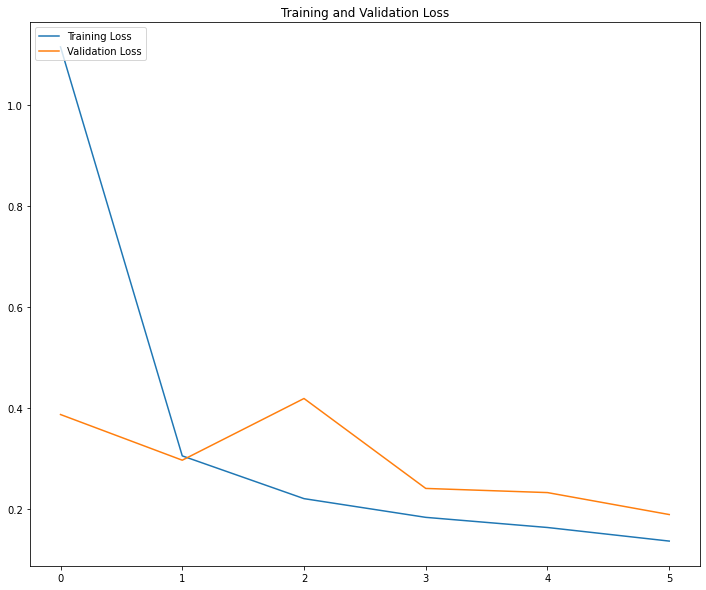

In [ ]:
#Lets take a look at our training loss vs our validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(12, 10))
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.show()

Here we can see the Training accuracy and validation accuracy for our six epochs. We can see that overall both our validation and training accuracy are highly aligned. The two seem to indicate that the module can predict which fruit is which with roughly 95% accuracy. 

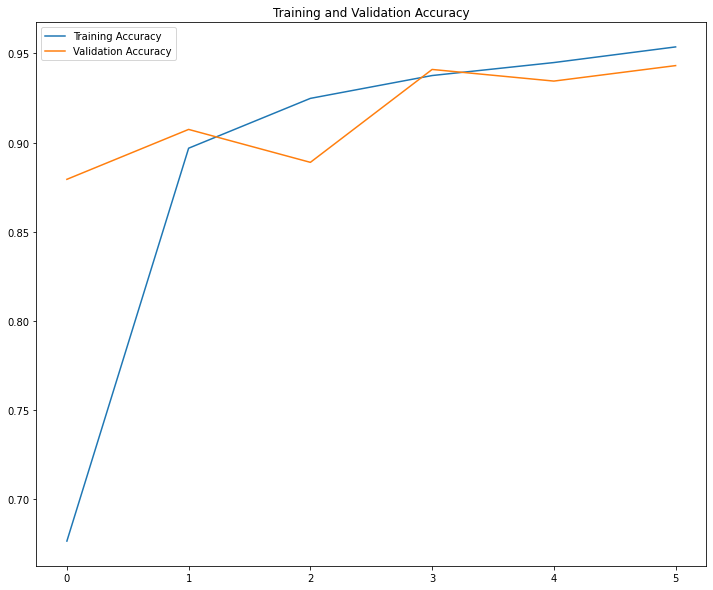

In [ ]:
#Lets take a look at our training accuracy vs our validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(6)

plt.figure(figsize=(12, 10))
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
#Save the model
model.save('modelfruit2')

INFO:tensorflow:Assets written to: modelfruit2/assets


Now we can see how well our model has performed. In comparison with our RMSprom model we definately see better results here. A high validation accuracy, and a low validation loss are what we were hoping for. Our model remains relativley well predictive of our dataset. It's overall performance is acceptable for it's use case.

## Citation

https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

https://www.kaggle.com/anshumansharma002/fruit-classification-cnn-vgg

https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

https://www.degruyter.com/document/doi/10.1515/jisys-2014-0079/html

https://www.youtube.com/watch?v=57N1g8k2Hwc

https://www.kaggle.com/databeru/classify-131-fruits-1-epoch-acc-95/notebook

file:///home/chronos/u-4b6141f60e848a11f7bb3b86795f10d2fef667b7/MyFiles/Downloads/dokumen.pub_ai-and-machine-learning-for-coders-a-programmers-guide-to-artificial-intelligence-1nbsped-1492078190-9781492078197.pdf

In [ ]:
model = tf.keras.models.load_model('modelfruit2')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mystery_fruit_1.jpg to mystery_fruit_1 (2).jpg


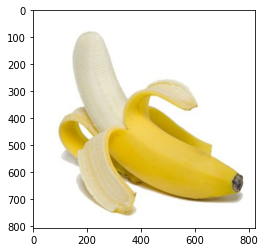

In [ ]:
img = mpimg.imread('mystery_fruit_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img_path = '/content/mystery_fruit_1.jpg'

In [ ]:
img = Image.open(img_path)
img = img.resize((100,100))
img = np.array(img)
img = img / 255.0
img = img.reshape(1,100,100,3)

array=model.predict(img)
model.predict(img)


array([[4.2977758e-20, 3.9914854e-23, 6.2780209e-10, 1.3375637e-05,
        1.5580273e-09, 8.2267487e-10, 1.0689486e-12, 5.7305212e-19,
        1.2740079e-14, 3.0378428e-19, 1.2956372e-13, 5.6255856e-10,
        2.5002267e-10, 1.7533497e-15, 4.2316662e-14, 6.9490713e-13,
        1.0516781e-04, 8.8365644e-01, 7.0145808e-12, 1.1322793e-14,
        1.7779362e-12, 3.7994059e-03, 1.6933795e-08, 1.4059730e-15,
        1.6816359e-02, 2.0427479e-10, 1.8716154e-14, 1.7077191e-12,
        2.3395985e-13, 6.8581866e-14, 4.0052597e-15, 6.4093418e-11,
        2.0333187e-20, 5.3695472e-14, 2.3444434e-22, 8.3629757e-02,
        5.8832789e-08, 5.1425078e-09, 9.5146790e-10, 1.1080920e-10,
        1.3622961e-13, 1.5293873e-10, 1.1162968e-11, 1.9820517e-11,
        1.2793603e-14, 3.1623771e-19, 2.4871363e-07, 2.6851278e-05,
        9.4184827e-07, 1.0518765e-12, 2.8879509e-16, 2.6823341e-06,
        4.4322334e-08, 7.7460009e-16, 4.0450580e-08, 2.9911906e-11,
        1.8548579e-19, 4.5651642e-11, 4.2866635e

In [ ]:
list1 = array.tolist()

In [ ]:
list1

[[4.2977758462932303e-20,
  3.9914853502132415e-23,
  6.278020880934321e-10,
  1.3375636626733467e-05,
  1.5580272627602199e-09,
  8.226748726691824e-10,
  1.0689486405410231e-12,
  5.730521168129551e-19,
  1.2740079411083845e-14,
  3.037842771586015e-19,
  1.2956371815264073e-13,
  5.625585552948564e-10,
  2.500226692347951e-10,
  1.7533497304869292e-15,
  4.2316661513861625e-14,
  6.94907130970035e-13,
  0.00010516781185287982,
  0.8836564421653748,
  7.0145807565258345e-12,
  1.1322793390551849e-14,
  1.77793619670491e-12,
  0.0037994058802723885,
  1.693379481082502e-08,
  1.405973048488468e-15,
  0.016816359013319016,
  2.0427479152651529e-10,
  1.8716153504945952e-14,
  1.7077191440464934e-12,
  2.3395985127537544e-13,
  6.858186571813765e-14,
  4.0052596655959505e-15,
  6.409341807289692e-11,
  2.033318674669453e-20,
  5.369547173431424e-14,
  2.344443365912444e-22,
  0.08362975716590881,
  5.8832789306961786e-08,
  5.14250775296432e-09,
  9.514679044642094e-10,
  1.108092020918

In [ ]:
d = {'class':class_names,'confidence':list1[0]}

In [ ]:
len(list1[0])

131

In [ ]:
df = pd.DataFrame(d)
df=df.reset_index(drop=True)
df

,class,confidence
0,Apple Braeburn,4.297776e-20
1,Apple Crimson Snow,3.991485e-23
2,Apple Golden 1,6.278021e-10
3,Apple Golden 2,1.337564e-05
4,Apple Golden 3,1.558027e-09
...,...,...
126,Tomato Maroon,4.540018e-18
127,Tomato Yellow,1.411109e-09
128,Tomato not Ripened,2.643940e-07
129,Walnut,1.480926e-20


In [ ]:
sort_df = df.sort_values('confidence',ascending=False)
sort_df.head()

,class,confidence
17,Banana Lady Finger,0.883656
35,Corn,0.083630
24,Carambula,0.016816
67,Maracuja,0.005788
21,Cactus fruit,0.003799


In [ ]:
print('The model is most confident that it is ' + sort_df['class'].head(1))

17    The model is most confident that it is Banana ...
Name: class, dtype: object


In [ ]:
img_path = '/content/test3.jpeg'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test9.jpeg to test9.jpeg


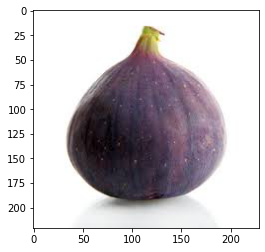

In [ ]:
img = mpimg.imread('test9.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img_path = '/content/test9.jpeg'

In [ ]:
img = Image.open(img_path)
img = img.resize((100,100))
img = np.array(img)
img = img / 255.0
img = img.reshape(1,100,100,3)

array=model.predict(img)
model.predict(img)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.01572939e-31, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.92676482e-36, 7.06407191e-24,
        2.41889848e-33, 0.00000000e+00, 2.17112225e-36, 2.28363173e-34,
        8.44119084e-22, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.83275103e-27, 0.00000000e+00,
        0.00000000e+00, 4.14601280e-38, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.37996606e-31, 0.00000000e+00, 0.00000000e+00,
        4.36252593e-29, 0.00000000e+00, 0.00000000e+00, 7.20519620e-06,
        1.39868846e-37, 1.98635755e-25, 0.00000000e+00, 3.04784907e-35,
        2.46377783e-32, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.20437005e-35, 0.00000000e+00, 3.63006563e-38,
        0.00000000e+00, 0.00000000e+00, 4.21655411e-03, 9.112595

In [ ]:
list1 = array.tolist()

In [ ]:
list1

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.015729387118978e-31,
  0.0,
  0.0,
  0.0,
  5.926764815406646e-36,
  7.064071912550486e-24,
  2.418898479659517e-33,
  0.0,
  2.1711222458696222e-36,
  2.283631727398756e-34,
  8.441190843970312e-22,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.832751031704457e-27,
  0.0,
  0.0,
  4.1460127980876646e-38,
  0.0,
  0.0,
  0.0,
  7.37996606384095e-31,
  0.0,
  0.0,
  4.3625259311332697e-29,
  0.0,
  0.0,
  7.205196197901387e-06,
  1.3986884618571042e-37,
  1.9863575525437804e-25,
  0.0,
  3.047849073872134e-35,
  2.463777825416355e-32,
  0.0,
  0.0,
  0.0,
  0.0,
  3.2043700496927083e-35,
  0.0,
  3.6300656336512887e-38,
  0.0,
  0.0,
  0.00421655410900712,
  9.112595933044867e-37,
  0.0,
  0.0,
  5.3348826635550705e-33,
  1.485296231364612e-34,
  1.574575364518027e-36,
  2.795053182173795e-33,
  7.897311880483892e-37,
  0.0,
  5.173986815511552e-31,
  0.0,
  0.0,
  4.4466893602521346e-35,
  1.1782901094144312e-37,
  7.40

In [ ]:
d = {'class':class_names,'confidence':list1[0]}

In [ ]:
len(list1[0])

131

In [ ]:
df = pd.DataFrame(d)
df=df.reset_index(drop=True)
df

,class,confidence
0,Apple Braeburn,0.000000e+00
1,Apple Crimson Snow,0.000000e+00
2,Apple Golden 1,0.000000e+00
3,Apple Golden 2,0.000000e+00
4,Apple Golden 3,0.000000e+00
...,...,...
126,Tomato Maroon,0.000000e+00
127,Tomato Yellow,2.092960e-32
128,Tomato not Ripened,2.819220e-27
129,Walnut,0.000000e+00


In [ ]:
sort_df = df.sort_values('confidence',ascending=False)
sort_df.head()

104    Plum 3
Name: class, dtype: object


,class,confidence
104,Plum 3,9.957762e-01
54,Huckleberry,4.216554e-03
39,Dates,7.205196e-06
113,Raspberry,5.399519e-18
69,Mulberry,7.404939e-19


In [ ]:
print('The model is most confident that it is ' + sort_df['class'].head(1))

104    The model is most confident that it is Plum 3
Name: class, dtype: object


In [ ]:
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M